# SiNAPS Documentation

Import sinaps module

In [1]:
import sinaps as sn

## Section

The class `Section` represents a section of neuron with uniform physical values

The characteristics of a section are :
+ The length `L` in **μm**
+ The radius `a` in **μm**
+ The menbrane capacitance `C_m` in **μF/cm²**
+ The longitunal resistance `R_l` in **Ohm.cm**
+ The initial potential `V0` in **mV**

### Default parameters

In [2]:
sec0 = sn.Section(name="Sample section")
sec0

Section **Sample section**
+ L: 100 um
+ a: 1 um
+ C_m: 10 fF/μm²
+ R_l: 1.5 MΩ.μm
+ channels: 
+ point_channels: 

### Customized values

In [3]:
sec1 = sn.Section(
               L=100,#100 μm (Migliore et al 2005) up to 600 μm
               a=1,#1 μm  (Migliore et al 2005) 0.3 to 5 μm (for oblique dend)
               C_m=1,#10 mF/ m2 = 1 μF / cm2 (Migliore et al 2005) taum = 28 ms -> Cm = 1 μF/cm2
               R_l=150, #(Migliore et al 2005) 150 Ω.cm
               V0 = 0, # mV
               name = "Sample section 2"
        ) 
sec1

Section **Sample section 2**
+ L: 100 um
+ a: 1 um
+ C_m: 10 fF/μm²
+ R_l: 1.5 MΩ.μm
+ channels: 
+ point_channels: 

## Channels

Ion channels can be added to a section.

There are two types of channels
+ Point channels
+ Density channels




### Density Channels
Point channels are used to model channels that distributed on all the section. The current is given per unit of membrane surface

#### Leak Channel


In [4]:
lc1=sn.channels.LeakChannel()
lc1

LeakChannel(Veq=0 V, R_m=28 kΩ.cm²)

In [5]:
lc2=sn.channels.LeakChannel(
            Veq=10, #mV
            R_m= 20 #kΩ.cm²
            )
lc2

LeakChannel(Veq=10 mV, R_m=20 kΩ.cm²)

In [16]:
sec0.add_channel_c(lc1)
sec0

Section **Sample section**
+ L: 100 um
+ a: 1 um
+ C_m: 10 fF/μm²
+ R_l: 1.5 MΩ.μm
+ channels: LeakChannel(Veq=0 V, R_m=28 kΩ.cm²)
  + LeakChannel(Veq=0 V, R_m=28 kΩ.cm²)
+ point_channels: 0:ConstantCurrent(I=1 pA)

### Point Channels
Point channels are used to model channel in specific location of the section, the current is given in absolute

### Constant current

In [17]:
pc=sn.channels.ConstantCurrent(1)

In [18]:
sec0.add_channel_p(pc,0)
sec0

Section **Sample section**
+ L: 100 um
+ a: 1 um
+ C_m: 10 fF/μm²
+ R_l: 1.5 MΩ.μm
+ channels: LeakChannel(Veq=0 V, R_m=28 kΩ.cm²)
  + LeakChannel(Veq=0 V, R_m=28 kΩ.cm²)
+ point_channels: 0:ConstantCurrent(I=1 pA)
  + 0:ConstantCurrent(I=1 pA)

In [19]:
N=sn.Neuron()

In [20]:
N.add_section(sec0,0,1)

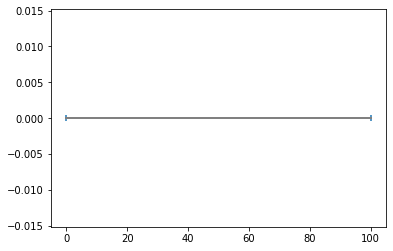

In [21]:
N.view.graph()

In [24]:
N

Neuron(["0-1: Section(name=Sample section, L=100 um, a=1 um, C_m=10 fF/μm², R_l=1.5 MΩ.μm, channels : [LeakChannel(Veq=0 V, R_m=28 kΩ.cm²), LeakChannel(Veq=0 V, R_m=28 kΩ.cm²)], point_channels : ['0:ConstantCurrent(I=1 pA)', '0:ConstantCurrent(I=1 pA)'])"])

In [25]:
sim=sn.Simulation(N,dx=10)

In [26]:
sim.run((0,300),max_step=1)

In [32]:
import pandas as pd
pd.set_option('plotting.backend', 'pandas_bokeh')
pd.plotting.output_notebook()

Loading BokehJS ...

In [33]:
sim.V[0].plot(ylabel='Voltage (mV)',xticks=range(0,100,10),figsize=(800,300))

Figure(id='2048', ...)